#**DBSCAN**


#Step 1 : Import Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [340]:
# Load data in X
x, y = make_blobs(n_samples=1000, centers=4,cluster_std=0.50, random_state=0)


#Step 3 : Modeling The Data Using DBSCAN



In [356]:
db = DBSCAN(eps=0.5,min_samples=10).fit(x)

In [357]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#labels

In [358]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['y', 'b', 'g', 'r']


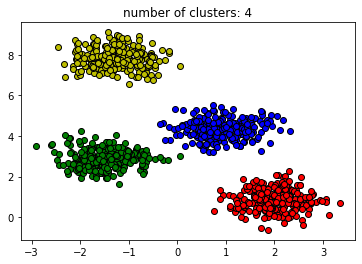

In [359]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [360]:
from sklearn import metrics
sc = metrics.silhouette_score(x, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.72
Adjusted Rand Index: 0.98


#**Well Done :)**